In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

!pip install fanalysis
from fanalysis.mca import MCA

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, ExtraTreesClassifier, StackingClassifier

from sklearn.metrics import f1_score, confusion_matrix, classification_report, confusion_matrix, plot_precision_recall_curve, precision_recall_curve, auc
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV, RandomizedSearchCV

from sklearn.preprocessing import OneHotEncoder

from google.colab import drive
drive.mount('/content/drive')

     |████████████████████████████████| 56 kB 2.5 MB/s 
Mounted at /content/drive


In [2]:
#import warnings
#warnings.filterwarnings("ignore")

In [187]:
# option d'affichage des résultats
pd.set_option("display.max_row",100)
pd.set_option("display.max_columns",100)

In [178]:

colonnes_louis=["IDENT","Top_mon","predic_mon_top","prob_mon_top"]

tableau_louis = pd.read_csv("/content/drive/MyDrive/spad_score_method_1/spad_projection_FDFTOT21/file1.csv", sep= ";", header = 0, names=colonnes_louis, low_memory=False, dtype=str )#, dtype='Int64')


In [4]:
# les noms des variables

colonnes =(["IDENT", "TypeHabi", "GeoFaz_Scl", "GeoFaz_cl", "ImmoFaz_Scl", "ImmoFaz_cl", "Anciennete",
            "Logement_prix_m2", "Mediane_RFR", "Sexe", "Prenom_Phase_scl_H", "Prenom_Phase_scl_F",
            "Prenom_Phase_cl_H", "Prenom_Phase_cl_F", "Age_H", "Age_F", "Affinite_1", "Affinite_2",
            "Prenom_effectif", "Potentiel_prenom", "Onoma-Phase_Scl", "Onoma-Phase_CL", "Top_mon"])

In [5]:
#data_orig = pd.read_csv("C:/Users/Christian/Desktop/my_data_FDFIFI19.txt",sep=" " , names = colonnes, low_memory=False, dtype=str )#, dtype='Int64')
data_orig = pd.read_csv("/content/drive/MyDrive/spad_score_method_1/spad_projection_FDFTOT21/sans_8_new_my_data_FDFTOT21.txt", delim_whitespace="\t", header = None, names=colonnes, low_memory=False, dtype=str )#, dtype='Int64')
data = data_orig.copy()
data

,IDENT,TypeHabi,GeoFaz_Scl,GeoFaz_cl,ImmoFaz_Scl,ImmoFaz_cl,Anciennete,Logement_prix_m2,Mediane_RFR,Sexe,Prenom_Phase_scl_H,Prenom_Phase_scl_F,Prenom_Phase_cl_H,Prenom_Phase_cl_F,Age_H,Age_F,Affinite_1,Affinite_2,Prenom_effectif,Potentiel_prenom,Onoma-Phase_Scl,Onoma-Phase_CL,Top_mon
0,0010000001,02,81,08,91,09,06,21,21,01,71,41,07,04,12,04,20,02,02,01,51,05,1
1,0010000006,01,75,07,43,04,06,06,13,02,71,64,07,06,12,09,04,12,04,13,12,01,1
2,0010000011,01,76,07,43,04,06,06,16,03,54,81,05,08,07,12,06,06,04,18,36,03,2
3,0010000013,03,75,07,43,04,04,06,13,01,71,36,07,03,12,11,11,19,04,06,21,02,1
4,0010000015,02,33,03,44,04,06,07,12,01,71,42,07,04,12,05,14,03,03,01,14,01,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192175,0370109343,01,64,06,82,08,05,16,17,02,71,81,07,08,12,12,21,21,06,21,61,06,NaN
1192176,0370109344,03,61,06,64,06,06,14,01,04,44,81,04,08,05,12,01,05,01,03,54,05,NaN
1192177,0370109345,02,13,01,42,04,07,07,15,02,71,81,07,08,12,12,21,21,06,21,61,06,NaN
1192178,0370109346,02,31,03,82,08,08,16,19,02,71,45,07,04,12,03,02,02,03,01,44,04,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1192180 entries, 0 to 1192179
Data columns (total 23 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   IDENT               1192180 non-null  object
 1   TypeHabi            1192180 non-null  object
 2   GeoFaz_Scl          1192180 non-null  object
 3   GeoFaz_cl           1192180 non-null  object
 4   ImmoFaz_Scl         1192180 non-null  object
 5   ImmoFaz_cl          1192180 non-null  object
 6   Anciennete          1192180 non-null  object
 7   Logement_prix_m2    1192180 non-null  object
 8   Mediane_RFR         1192180 non-null  object
 9   Sexe                1192180 non-null  object
 10  Prenom_Phase_scl_H  1192180 non-null  object
 11  Prenom_Phase_scl_F  1192180 non-null  object
 12  Prenom_Phase_cl_H   1192180 non-null  object
 13  Prenom_Phase_cl_F   1192180 non-null  object
 14  Age_H               1192180 non-null  object
 15  Age_F               1192180 non-

In [39]:
#nombre de modalités de chaque variables (dans un dataframe)
def nombre_mod(data2):
    #création d'un dataframe vide
    dff= pd.DataFrame(columns=["VARIABLE","NOMBRE_MOD", "NOMBRE_MOD_SANS_NA"])
    for i in range(data2.shape[1]): # sans compter les valeurs manquantes
        taille =len(data2.iloc[:,i].value_counts(dropna=False))
        taille_1 = len(data2.iloc[:,i].value_counts(dropna=True) )
        dff=dff.append({"VARIABLE": colonnes[i],"NOMBRE_MOD":taille, "NOMBRE_MOD_SANS_NA":taille_1 }, ignore_index=True)
    return dff

# sélection des corrélations les plus importantes
def variables_corr(tableau_corr, seuil):
    colonnes = tableau_corr.columns
    val_temp = 0 
    variables_corr_pos=[] ; variables_corr_pos_val=[]
    variables_corr_neg=[] ; variables_corr_neg_val=[]
    for i in range(tableau_corr.shape[0]):  
        for j in range(tableau_corr.shape[0]):
            if i<j: #i!=j:
                if (tableau_corr.iloc[i,j] > seuil):
                    variables_corr_pos.append(colonnes[j])
                    variables_corr_pos_val.append(round( tableau_corr.iloc[i,j], 2))
                    val_temp += 1

                if (tableau_corr.iloc[i,j] <-seuil):
                    variables_corr_neg.append(colonnes[j])
                    variables_corr_neg_val.append(round( tableau_corr.iloc[i,j], 2))
                    val_temp += 1

        if (len(variables_corr_pos) > 0) | (len(variables_corr_neg) >0) :
            print("variable : ", colonnes[i])
            if len(variables_corr_pos) > 0:    
                print("corr pos", variables_corr_pos)
                print("corr pos", variables_corr_pos_val)
                val_temp += 1

            if len(variables_corr_neg) >0:  
                print("corr neg", variables_corr_neg)
                print("corr neg", variables_corr_neg_val)
                val_temp += 1
            print("")
        variables_corr_pos = variables_corr_pos*0
        variables_corr_neg = variables_corr_pos*0

        variables_corr_pos_val = variables_corr_pos_val*0
        variables_corr_neg_val = variables_corr_pos_val*0
    if val_temp == 0:
        print("IL N'Y A PAS DE CORRELATION ENTRE LES VARIABLES PAR RAPPORT AU SEUIL PRIS")
        

def evaluation(model, X_train, y_train, X_test, y_test, scoring, plot):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print("test set : ")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred)) 
    print("train set : ")
    print(confusion_matrix(y_train, model.predict(X_train)))  
    print(classification_report(y_train, model.predict(X_train) ))

    if plot == True:
        N, train_score, val_score = learning_curve(model, X_train, y_train, shuffle=True, cv = 4, scoring = scoring, train_sizes = np.linspace(0.1, 1, 6) )

        plt.figure(figsize = (10,6))
        plt.plot(N, train_score.mean(axis=1), label ="train_score")
        plt.plot(N, val_score.mean(axis=1), label ="cross_validation_score")
        plt.legend()
    else :
        print("GRAPHIQUE NON DEMANDE")

# Comme il n'y a pas de valeurs manquantes (à la place il y a un nombre), le seul traitement qu'on fait c'est tranformer
# le type de variable (les variables continues deviennent qualitatives)
def data_processing(df):
    """ 
    for i in range(0,len(df.columns)):    
        df[df.columns[i]].fillna(100.0, inplace=True) #On remplace les données manquantes par 100
    for i in range(0,len(df.columns)):
        print(df[df.columns[i]].value_counts(dropna=False))    
    """
    
   #Transformation de toutes les variables en facteurs         
    for i in range(0,len(df.columns)):
        df[df.columns[i]] = df[df.columns[i]].astype('category')
    return df.to_numpy() #.as_matrix()


def vingtiles(model, data_orig, affichage, save, path): # data_orig est une variables locale (peut être différente au df d'origine)
    # position de la dernière variable explicative dans le dataset
    nb_var = data_orig.shape[1]-1

    # predict sur tous les individus (avec et sans classe Top_mon)
    tous_probas = model.predict_proba(data_orig.iloc[:,1:nb_var])
    df_tous = pd.DataFrame({'IDENT': data_orig.iloc[:,0] , 'PROBA': tous_probas[:,0] })
    #df_tous
    
    # valeurs ordonnées pour diviser après
    df_tous=df_tous.sort_values(by='PROBA', ascending=True)
    #df_tous
    print(df_tous)
    
    #vérification
    print(df_tous['PROBA'].value_counts())

    # vingtiles
    df_temp =pd.DataFrame( pd.qcut(df_tous['PROBA'],q= 20)  )
    #print(df_temp)

    # ajout par index (IMPORTANTE)
    df_tous["TRANCHES"]=pd.DataFrame(df_temp.iloc[:,0].to_numpy(),index= df_temp.index)
    #print(df_tous)

    # création de la dernière colonne CLASSE et son remplissage
    index_20_ord = pd.DataFrame(np.unique(df_tous["TRANCHES"])) 
    df_tous["CLASSE"]=df_tous["TRANCHES"].copy()
    ind_val=1
    for kk in range(20):
        df_tous["CLASSE"][df_tous["CLASSE"]== index_20_ord.iloc[kk,0] ] = str(ind_val) 
        ind_val+=1
    print(df_tous)   

    # pour la colonne Top_mon : changement de type de variable et remplissage des valeurs (s'il le faut)
    data_temp_t = data_orig.copy()
    data_temp_t["Top_mon"] =  data_temp_t["Top_mon"].replace(1.0,'1')
    data_temp_t["Top_mon"] =  data_temp_t["Top_mon"].replace(2.0,'2')
    data_all_complet_class = data_temp_t #data_temp_t.fillna('2')
    #data_all_complet_class

    # jointure
    ident_class_tous = data_all_complet_class[["IDENT","Top_mon"]]
    tableau_resultats = pd.merge(df_tous,ident_class_tous)
    #tableau_resultats
    df_tous = pd.merge(df_tous, ident_class_tous)


    # tranches finales
    tab_cross_temp = pd.crosstab(tableau_resultats["TRANCHES"],tableau_resultats["Top_mon"])
    #print(tab_cross_temp); print("-----------------------")

    # création d'une colonne TOTAL
    tab_cross_temp["TOTAL"]=tab_cross_temp["1"]+tab_cross_temp["2"]
    
    # affichage
    if affichage ==True:        
        print(tab_cross_temp)

    # création du tableau final en éliminant la colonne 2
    #tab_pour_excel = tab_cross_temp.drop(["2"], axis=1)

    # si on ne veut pas éliminer la colonne 2
    tab_pour_excel =  tab_cross_temp
    
    # enregistrement sous Excel
    if save == True:
        tab_pour_excel.to_excel(path)

    return  df_tous


def tableau_5_montant(df_tous, data_montant_orig, affichage, save, path):
    # tableau avec les deux variables qui nous intéressent
    ident_et_montant = data_montant_orig[["IDENT","SommeDeMONTANT_NUM"]]

    # jointure
    tableau_resultats_et_montant = pd.merge(df_tous,ident_et_montant)
    #print(tableau_resultats_et_montant) 

    # on élimine toutes les sommes supérieur à 5000 €
    tableau_resultats_et_montant = tableau_resultats_et_montant[tableau_resultats_et_montant["SommeDeMONTANT_NUM"] <= 5000]
    print(tableau_resultats_et_montant) 
    #print(tableau_resultats_et_montant["TRANCHES"].value_counts())
    #print(pd.DataFrame(np.unique(tableau_resultats_et_montant["TRANCHES"])))

    # index
    index_temp = pd.DataFrame(np.unique(tableau_resultats_et_montant["TRANCHES"])) 

    # création du tableau qui contiendra les résultats finaux
    tableau_resultats_finaux = pd.DataFrame(columns=["TRANCHES","Moyen_Somme","TOTAL"],index=range(20))
    tableau_resultats_finaux["TRANCHES"] = index_temp

    # remplissage du tableau final
    for k in range(20):
        tableau_resultats_finaux.iloc[k,1] = tableau_resultats_et_montant[tableau_resultats_et_montant["TRANCHES"]==index_temp.iloc[k,0]]["SommeDeMONTANT_NUM"].mean()
        tableau_resultats_finaux.iloc[k,2] = (tableau_resultats_et_montant["TRANCHES"]==index_temp.iloc[k,0]).sum()
    
    # affichage
    if affichage:        
        print(tableau_resultats_finaux)
    
    # enregistrement sous Excel
    if save:
        tableau_resultats_finaux.to_excel(path)


def vingtiles_ind_sans_target(model, data_orig, affichage, save, path):
    # position de la dernière variable explicative dans le dataset
    nb_var = data_orig.shape[1]-1

    # predict sur tous les individus (avec et sans classe IFI+)
    tous_probas = model.predict_proba(data_orig.iloc[:,1:nb_var])
    df_tous = pd.DataFrame({'IDENT': data_orig.iloc[:,0] , 'PROBA': tous_probas[:,0] })
    #df_tous
    
    # valeurs ordonnées pour diviser après
    df_tous=df_tous.sort_values(by='PROBA', ascending=True)
    #df_tous
    print(df_tous)
    
    #vérification
    print(df_tous['PROBA'].value_counts())

    # quarantiles
    df_temp =pd.DataFrame( pd.qcut(df_tous['PROBA'],q= 20)  )
    print(df_temp)

    # ajout par index (IMPORTANTE)
    df_tous["TRANCHES"]=pd.DataFrame(df_temp.iloc[:,0].to_numpy(),index= df_temp.index)
    print(df_tous)
    print(df_tous["TRANCHES"].value_counts(ascending = True))

    # GERE L'ORDRE
    patra = np.unique(df_tous.iloc[:,2], return_counts=True)
    df_tranches_sans_target = pd.DataFrame([patra[0],patra[1]]).T
    df_tranches_sans_target.columns=["TRANCHES","COUNTS"]

    # affichage
    if affichage ==True:        
        print(df_tranches_sans_target)
    
    # enregistrement sous Excel
    if save == True:
        df_tranches_sans_target.to_excel(path)
    

# élimination des variables trop corrélées (choix manuel)
def elimination_val_corr(data):
    data = data.drop(columns=[""])
    return data
          


In [8]:
#################################################################################################
#                       SANS VARIABLES CORR ET ENCODAGE DUMMIES
#################################################################################################

In [9]:
# test predict individus sans classe
data = data_orig.copy()

# on élimine les variables dons
data=data.drop(["GeoFaz_cl", "ImmoFaz_Scl", "ImmoFaz_cl", "Prenom_Phase_cl_H", "Prenom_Phase_cl_F",
                "Onoma-Phase_Scl", "Onoma-Phase_CL"],axis=1)

# encodage Onehot sur toutes les données (on évite ainsi les erreurs futures)
nb_var = data.shape[1] - 1
data_1_22 = pd.get_dummies(data.iloc[:,1:(data.shape[1]-1)], columns=data.columns[1:(data.shape[1]-1)] )
data_var_qualitatives_temp =  pd.concat([data["IDENT"], data_1_22, data["Top_mon"]], axis=1)
data = data_var_qualitatives_temp
#encodage = OneHotEncoder()
#encodage.fit(data_processing(data.iloc[:,1:nb_var]))

# élimination des individus n'ayant pas de valeur pour la varialbe Top_mon
"""IMPORTANT"""
data_sans_nan = data[(data.isnull()).sum(axis=1) == 0]

#conversion du type de variable
for i in range(1,data_sans_nan.shape[1]):
    data_sans_nan.iloc[:,i]=data_sans_nan.iloc[:,i].astype(int)

# base de données avec des variables corrélées et avec encodage OneHot
data =data_sans_nan

nb_var = data.shape[1] - 1
train_set, test_set = train_test_split(data, test_size = 0.2, random_state=0 )

train_X_s = (train_set.iloc[:,1:nb_var]).to_numpy()
train_Y_s = np.asanyarray(train_set.iloc[:,nb_var])

test_X_s = (test_set.iloc[:,1:nb_var]).to_numpy()
test_Y_s = np.asanyarray(test_set.iloc[:,nb_var])


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [10]:
#######################################################################################################
#######################################################################################################

In [157]:

final_model_LogisticRegression = LogisticRegression(random_state =0, C=0.01,penalty="l2" , solver="newton-cg", max_iter= 10000, class_weight="balanced")
evaluation(final_model_LogisticRegression, train_X_s, train_Y_s, test_X_s, test_Y_s, scoring="recall", plot=False )

final_model_AdaBoost = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(class_weight="balanced", criterion="gini",max_depth=2),n_estimators = 20 , random_state=0 ) 
evaluation(final_model_AdaBoost, train_X_s, train_Y_s, test_X_s, test_Y_s, scoring="recall" , plot =False)

final_model_RandomForestClassifier = RandomForestClassifier(class_weight="balanced", criterion="gini", max_depth=3, max_features=25, n_estimators = 100, random_state=0) 
evaluation(final_model_RandomForestClassifier, train_X_s, train_Y_s, test_X_s, test_Y_s, scoring="recall", plot=False)

final_model_ExtraTreesClassifier = ExtraTreesClassifier( criterion="entropy", max_depth=3, max_features=30, n_estimators=50 , class_weight="balanced", random_state=0)  
evaluation(final_model_ExtraTreesClassifier, train_X_s, train_Y_s, test_X_s, test_Y_s, scoring="recall", plot=False)


test set : 
[[3075 2256]
 [5481 9048]]
              precision    recall  f1-score   support

           1       0.36      0.58      0.44      5331
           2       0.80      0.62      0.70     14529

    accuracy                           0.61     19860
   macro avg       0.58      0.60      0.57     19860
weighted avg       0.68      0.61      0.63     19860

train set : 
[[12174  9223]
 [21387 36652]]
              precision    recall  f1-score   support

           1       0.36      0.57      0.44     21397
           2       0.80      0.63      0.71     58039

    accuracy                           0.61     79436
   macro avg       0.58      0.60      0.57     79436
weighted avg       0.68      0.61      0.63     79436

GRAPHIQUE NON DEMANDE
test set : 
[[2826 2505]
 [4948 9581]]
              precision    recall  f1-score   support

           1       0.36      0.53      0.43      5331
           2       0.79      0.66      0.72     14529

    accuracy                          

In [12]:

num_var_max = data.shape[1] - 1
num_var_max

270

In [13]:
# fonction qui va diviser et calculer les coordonnées des individus 
def transform_to_coord(data):
    coord_part = 0
    coord = acm.transform(data.iloc[0:30000,1:num_var_max].values)
    k=30000
    nb_part = round(data.shape[0]/k)
    for i in range(1, nb_part):
        coord_part=acm.transform(data.iloc[i*k:(i+1)*k,1:num_var_max].values)
        coord=np.concatenate((coord, coord_part))

    coord_part = acm.transform(data.iloc[nb_part*k: ,1:num_var_max].values )
    coord=np.concatenate((coord, coord_part))
    return coord

In [14]:
#instanciation
acm = MCA(var_labels = data.columns[1:num_var_max], n_components=55)  # paramètres index manquante (gérer après)
#apprentissage 
"ne pas utiliser fit_tranform car le datset est trop grand "
acm.fit(data.iloc[:127115,1:num_var_max].values)

# tranformation du dataset
coord = transform_to_coord(data)

In [15]:
## ATTENTION
# élimination des individus n'ayant pas de valeur pour la variable Top_mon
data_sans_nan = data[(data.isnull()).sum(axis=1) == 0]
coord_sans_nan = coord[(data.isnull()).sum(axis=1) == 0] # coordonnées

#conversion du type de variable
for i in range(1,data_sans_nan.shape[1]):
    data_sans_nan.iloc[:,i]=data_sans_nan.iloc[:,i].astype(int) # essayer avec int64

# création
def creation_df_temp(data_sans_nan, coord_sans_nan):
    dfff = pd.DataFrame()
    dfff["IDENT"] = data_sans_nan.iloc[:,0]
    for i in range(coord_sans_nan.shape[1] ): #avant 10
        dfff[str(i)]=coord_sans_nan[:,i]
    dfff["Top_mon"] = data_sans_nan.iloc[:,data_sans_nan.shape[1]-1].astype(int)
    return dfff
# stockage
data_coord_nan = creation_df_temp(data_sans_nan, coord_sans_nan)
#data_coord_nan.info()

# maintien des individus  n'ayant pas de valeur pour la variable Top_mon

data_avec_nan = data
coord_avec_nan = coord # coordonnées
def creation_df_temp_2(data_avec_nan, coord_avec_nan):
    dfff = pd.DataFrame()
    dfff["IDENT"] = data_avec_nan.iloc[:,0]
    for i in range(coord_avec_nan.shape[1]): # avant 10
        dfff[str(i)]=coord_avec_nan[:,i]

    dfff["Top_mon"] = data_avec_nan.iloc[:,data_avec_nan.shape[1]-1] #.astype(int)

    dfff["Top_mon"] = dfff["Top_mon"].replace(1.0, '1')
    dfff["Top_mon"] = dfff["Top_mon"].replace(2.0,'2')
    return dfff

#stockage
data_coord_avec_nan = creation_df_temp_2(data_avec_nan, coord_avec_nan)
#data_coord_avec_nan.info()

In [16]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV

import imblearn
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [17]:
#data_non_corr = elimination_val_corr(data)
#nb_var = data_non_corr.shape[1] - 1
nb_var_acm = data_coord_nan.shape[1] - 1

train_set_acm, test_set_acm = train_test_split(data_coord_nan, test_size = 0.2, random_state=0) # , stratify =data_coord_nan["IFI+"] )

train_X_s_acm = (train_set_acm.iloc[:,1:nb_var_acm]).to_numpy()
train_Y_s_acm = np.asanyarray(train_set_acm.iloc[:,nb_var_acm])

test_X_s_acm = (test_set_acm.iloc[:,1:nb_var_acm]).to_numpy()
test_Y_s_acm = np.asanyarray(test_set_acm.iloc[:,nb_var_acm])

# comme les résulats sont en overfitting :
# Résultat du traitement sur le train set (under-sampling et over-sampling)
#abc_test = pd.read_csv("/content/drive/MyDrive/spad_score_method_1/spad_projection_FDFTOT21/sans_val_corr_spad_under_over_sampling.txt", delim_whitespace="\t", header = None, low_memory=False, dtype="Int64" ) #, dtype='Int64')
#abc_np = abc_test.to_numpy(dtype="Int64")

#X_resampled = abc_np[:,:-1]
#y_resampled = abc_np[:, abc_np.shape[1] -1 ]

In [18]:
# dimension du train set
print("Sans aucun traitement sur le train set : " , np.unique(train_Y_s_acm, return_counts=True))

# diminution des données
t2 = TomekLinks(random_state=0)
X_resampled, y_resampled = t2.fit_resample(train_X_s_acm[:,:nb_var_acm] , train_Y_s_acm )
print("Après under-sampling : ", np.unique(y_resampled, return_counts=True ))

# augmentation des données
tl = SMOTE(random_state=0)
X_resampled, y_resampled = tl.fit_resample(X_resampled, y_resampled )
print("Après over-smapling : " , np.unique(y_resampled, return_counts=True ))

'''
# enregistrement du nouveau train set car le traitement du under-sampling prendre du temps 
pd.DataFrame(np.concatenate((X_resampled, y_resampled.reshape((y_resampled.shape[0],1)) ),
                            axis=1)).to_csv("/content/drive/MyDrive/spad_score_method_1/spad_projection_FDFTOT21/val_all_spad_under_over_sampling.txt",
                                            sep=" ", index =False , header = False )
'''

Sans aucun traitement sur le train set :  (array([1, 2]), array([21397, 58039]))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Après under-sampling :  (array([1, 2]), array([21397, 50960]))
Après over-smapling :  (array([1, 2]), array([50960, 50960]))


'\n# enregistrement du nouveau train set car le traitement du under-sampling prendre du temps \npd.DataFrame(np.concatenate((X_resampled, y_resampled.reshape((y_resampled.shape[0],1)) ),\n                            axis=1)).to_csv("/content/drive/MyDrive/spad_score_method_1/spad_projection_FDFTOT21/val_all_spad_under_over_sampling.txt",\n                                            sep=" ", index =False , header = False )\n'

In [19]:
final_model_ADL = LinearDiscriminantAnalysis()  # la valeur par defaut de la tolérence donne le même résultat que tol=1e-5
evaluation(final_model_ADL, X_resampled, y_resampled, test_X_s_acm, test_Y_s_acm, scoring = "recall", plot=False)

test set : 
[[3201 2130]
 [5946 8583]]
              precision    recall  f1-score   support

           1       0.35      0.60      0.44      5331
           2       0.80      0.59      0.68     14529

    accuracy                           0.59     19860
   macro avg       0.58      0.60      0.56     19860
weighted avg       0.68      0.59      0.62     19860

train set : 
[[30389 20571]
 [19920 31040]]
              precision    recall  f1-score   support

           1       0.60      0.60      0.60     50960
           2       0.60      0.61      0.61     50960

    accuracy                           0.60    101920
   macro avg       0.60      0.60      0.60    101920
weighted avg       0.60      0.60      0.60    101920

GRAPHIQUE NON DEMANDE


In [20]:
final_model_ADQ = QuadraticDiscriminantAnalysis()  # la valeur par defaut de la tolérence donne le même résultat que tol=1e-5
evaluation(final_model_ADQ, X_resampled, y_resampled, test_X_s_acm, test_Y_s_acm, scoring = "recall", plot=False)

test set : 
[[2813 2518]
 [5149 9380]]
              precision    recall  f1-score   support

           1       0.35      0.53      0.42      5331
           2       0.79      0.65      0.71     14529

    accuracy                           0.61     19860
   macro avg       0.57      0.59      0.57     19860
weighted avg       0.67      0.61      0.63     19860

train set : 
[[27096 23864]
 [17200 33760]]
              precision    recall  f1-score   support

           1       0.61      0.53      0.57     50960
           2       0.59      0.66      0.62     50960

    accuracy                           0.60    101920
   macro avg       0.60      0.60      0.60    101920
weighted avg       0.60      0.60      0.60    101920

GRAPHIQUE NON DEMANDE


In [21]:
model_17_cw_ACM = LogisticRegression(random_state =0, C=3,penalty="l1" , solver="liblinear", max_iter= 10000, class_weight="balanced")
evaluation(model_17_cw_ACM, train_X_s_acm, train_Y_s_acm, test_X_s_acm, test_Y_s_acm, scoring="recall", plot=False )

test set : 
[[3129 2202]
 [5790 8739]]
              precision    recall  f1-score   support

           1       0.35      0.59      0.44      5331
           2       0.80      0.60      0.69     14529

    accuracy                           0.60     19860
   macro avg       0.57      0.59      0.56     19860
weighted avg       0.68      0.60      0.62     19860

train set : 
[[12312  9085]
 [22808 35231]]
              precision    recall  f1-score   support

           1       0.35      0.58      0.44     21397
           2       0.79      0.61      0.69     58039

    accuracy                           0.60     79436
   macro avg       0.57      0.59      0.56     79436
weighted avg       0.68      0.60      0.62     79436

GRAPHIQUE NON DEMANDE


In [22]:
#######################################################################################################
#######################################################################################################

In [158]:
vingtiles_tableau_LR = vingtiles(model =final_model_LogisticRegression, data_orig = data, affichage=True, save=False, path = " ")
vingtiles_tableau_LR.columns = ["IDENT","PROBA","TRANCHES","CLASSE_LR","Top_mon"]

vingtiles_tableau_Adaboost = vingtiles(model =final_model_AdaBoost, data_orig = data, affichage=True, save=False, path = " ")
vingtiles_tableau_Adaboost.columns = ["IDENT","PROBA","TRANCHES","CLASSE_Adaboost","Top_mon"]

vingtiles_tableau_RandomForestClassifier = vingtiles(model =final_model_RandomForestClassifier, data_orig = data, affichage=True, save=False, path = " ")
vingtiles_tableau_RandomForestClassifier.columns = ["IDENT","PROBA","TRANCHES","CLASSE_RandomF","Top_mon"]

vingtiles_tableau_ExtraTreesClassifier = vingtiles(model =final_model_ExtraTreesClassifier, data_orig = data, affichage=True, save=False, path = " ")
vingtiles_tableau_ExtraTreesClassifier.columns = ["IDENT","PROBA","TRANCHES","CLASSE_ExtraT","Top_mon"]

vingtiles_tableau_ADL_55 = vingtiles(model =final_model_ADL, data_orig = data_coord_nan, affichage=True, save=False, path = " ")
vingtiles_tableau_ADL_55.columns = ["IDENT","PROBA","TRANCHES","CLASSE_ADL_55","Top_mon"]

vingtiles_tableau_ADQ_55 = vingtiles(model =final_model_ADQ, data_orig = data_coord_nan, affichage=True, save=False, path = " ")
vingtiles_tableau_ADQ_55.columns = ["IDENT","PROBA","TRANCHES","CLASSE_ADQ_55","Top_mon"]


            IDENT     PROBA
29258  0010349235  0.212550
87780  0010522654  0.215477
36430  0010361036  0.216564
17995  0010281361  0.216926
6279   0010253033  0.218817
...           ...       ...
83536  0010503920  0.892491
60221  0010392936  0.895586
82851  0010500476  0.897917
83624  0010504178  0.897917
77220  0010412631  0.897917

[99296 rows x 2 columns]
0.887968    49
0.736208    28
0.654329    24
0.798384    19
0.734046    19
            ..
0.650367     1
0.428812     1
0.425654     1
0.319385     1
0.469140     1
Name: PROBA, Length: 96552, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


            IDENT     PROBA        TRANCHES CLASSE
29258  0010349235  0.212550  (0.212, 0.317]      1
87780  0010522654  0.215477  (0.212, 0.317]      1
36430  0010361036  0.216564  (0.212, 0.317]      1
17995  0010281361  0.216926  (0.212, 0.317]      1
6279   0010253033  0.218817  (0.212, 0.317]      1
...           ...       ...             ...    ...
83536  0010503920  0.892491    (0.7, 0.898]     20
60221  0010392936  0.895586    (0.7, 0.898]     20
82851  0010500476  0.897917    (0.7, 0.898]     20
83624  0010504178  0.897917    (0.7, 0.898]     20
77220  0010412631  0.897917    (0.7, 0.898]     20

[99296 rows x 4 columns]
Top_mon            1     2  TOTAL
TRANCHES                         
(0.212, 0.317]   647  4318   4965
(0.317, 0.345]   757  4208   4965
(0.345, 0.367]   805  4160   4965
(0.367, 0.386]   923  4042   4965
(0.386, 0.402]   965  3999   4964
(0.402, 0.419]   957  4008   4965
(0.419, 0.433]  1041  3924   4965
(0.433, 0.448]  1133  3832   4965
(0.448, 0.463]  1139  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


            IDENT     PROBA                       TRANCHES CLASSE
63493  0010397061  0.135818  (0.13570000000000002, 0.4908]      1
18843  0010291953  0.136391  (0.13570000000000002, 0.4908]      1
10385  0010257272  0.136550  (0.13570000000000002, 0.4908]      1
62181  0010395560  0.136550  (0.13570000000000002, 0.4908]      1
11441  0010258353  0.136550  (0.13570000000000002, 0.4908]      1
...           ...       ...                            ...    ...
99283  0010539458  0.532344               (0.5119, 0.5341]     20
88492  0010524610  0.532355               (0.5119, 0.5341]     20
83980  0010505638  0.532984               (0.5119, 0.5341]     20
79062  0010415013  0.533166               (0.5119, 0.5341]     20
93101  0010530839  0.534106               (0.5119, 0.5341]     20

[99296 rows x 4 columns]
Top_mon                           1     2  TOTAL
TRANCHES                                        
(0.13570000000000002, 0.4908]   656  4331   4987
(0.4908, 0.4919]                788

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


            IDENT     PROBA                     TRANCHES CLASSE
67904  0010401663  0.407182  (0.40599999999999997, 0.43]      1
53738  0010379725  0.408820  (0.40599999999999997, 0.43]      1
21093  0010337388  0.408885  (0.40599999999999997, 0.43]      1
42914  0010368050  0.409773  (0.40599999999999997, 0.43]      1
93208  0010530978  0.410760  (0.40599999999999997, 0.43]      1
...           ...       ...                          ...    ...
88310  0010524335  0.694018               (0.585, 0.694]     20
51004  0010376561  0.694018               (0.585, 0.694]     20
3728   0010049725  0.694018               (0.585, 0.694]     20
54667  0010381112  0.694018               (0.585, 0.694]     20
2071   0010027021  0.694018               (0.585, 0.694]     20

[99296 rows x 4 columns]
Top_mon                         1     2  TOTAL
TRANCHES                                      
(0.40599999999999997, 0.43]   733  4238   4971
(0.43, 0.435]                 871  4121   4992
(0.435, 0.445]    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


            IDENT     PROBA        TRANCHES CLASSE
14323  0010261341  0.402797  (0.402, 0.422]      1
21707  0010338071  0.402948  (0.402, 0.422]      1
61080  0010394340  0.402948  (0.402, 0.422]      1
35477  0010360000  0.402948  (0.402, 0.422]      1
23635  0010340220  0.402948  (0.402, 0.422]      1
...           ...       ...             ...    ...
50923  0010376412  0.718302  (0.596, 0.718]     20
75590  0010410331  0.718302  (0.596, 0.718]     20
2070   0010027016  0.718302  (0.596, 0.718]     20
98902  0010538813  0.718302  (0.596, 0.718]     20
15264  0010262550  0.718302  (0.596, 0.718]     20

[99296 rows x 4 columns]
Top_mon            1     2  TOTAL
TRANCHES                         
(0.402, 0.422]   876  4575   5451
(0.422, 0.427]   767  3714   4481
(0.427, 0.442]   908  4058   4966
(0.442, 0.447]  1346  6148   7494
(0.447, 0.449]   574  1863   2437
(0.449, 0.456]  1082  3887   4969
(0.456, 0.46]   1203  4345   5548
(0.46, 0.468]   1104  3423   4527
(0.468, 0.481]  1173  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


            IDENT     PROBA        TRANCHES CLASSE
85390  0010519316  0.124555   (0.124, 0.29]      1
73678  0010408023  0.125987   (0.124, 0.29]      1
11693  0010258609  0.136132   (0.124, 0.29]      1
29796  0010349953  0.139655   (0.124, 0.29]      1
8403   0010255206  0.140556   (0.124, 0.29]      1
...           ...       ...             ...    ...
40909  0010365982  0.880916  (0.698, 0.885]     20
34660  0010359130  0.882359  (0.698, 0.885]     20
97287  0010537076  0.882359  (0.698, 0.885]     20
59942  0010392241  0.882359  (0.698, 0.885]     20
88332  0010524378  0.885281  (0.698, 0.885]     20

[99296 rows x 4 columns]
Top_mon            1     2  TOTAL
TRANCHES                         
(0.124, 0.29]    708  4257   4965
(0.29, 0.328]    813  4152   4965
(0.328, 0.355]   864  4101   4965
(0.355, 0.377]   915  4050   4965
(0.377, 0.398]  1007  3957   4964
(0.398, 0.417]  1004  3961   4965
(0.417, 0.434]  1066  3899   4965
(0.434, 0.452]  1089  3876   4965
(0.452, 0.469]  1154  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


            IDENT          PROBA              TRANCHES CLASSE
16041  0010263606  1.503463e-101  (-0.0001, 2.543e-05]      1
39841  0010364732   3.278799e-96  (-0.0001, 2.543e-05]      1
54331  0010380748   2.775323e-84  (-0.0001, 2.543e-05]      1
61726  0010395046   2.346921e-68  (-0.0001, 2.543e-05]      1
24359  0010341301   1.175935e-63  (-0.0001, 2.543e-05]      1
...           ...            ...                   ...    ...
18360  0010286521   1.000000e+00         (0.9999, 1.0]     20
18445  0010289009   1.000000e+00         (0.9999, 1.0]     20
78020  0010413918   1.000000e+00         (0.9999, 1.0]     20
78521  0010414446   1.000000e+00         (0.9999, 1.0]     20
0      0010000001   1.000000e+00         (0.9999, 1.0]     20

[99296 rows x 4 columns]
Top_mon                    1     2  TOTAL
TRANCHES                                 
(-0.0001, 2.543e-05]     840  4125   4965
(2.543e-05, 0.0006313]   872  4093   4965
(0.0006313, 0.00356]     881  4084   4965
(0.00356, 0.01148]  

In [162]:
from functools import reduce
TABLEAU=vingtiles_tableau_LR[["IDENT", "CLASSE_LR", "Top_mon"]].copy()

TABLEAU = reduce(lambda left,right: pd.merge(left,right,on='IDENT'), [ TABLEAU,
                    vingtiles_tableau_Adaboost[["IDENT","CLASSE_Adaboost"]],
                    vingtiles_tableau_RandomForestClassifier[["IDENT","CLASSE_RandomF"]],
                    vingtiles_tableau_ExtraTreesClassifier[["IDENT","CLASSE_ExtraT"]],
                    vingtiles_tableau_ADL_55[["IDENT", "CLASSE_ADL_55"]],
                    vingtiles_tableau_ADQ_55[["IDENT","CLASSE_ADQ_55"]] ])

TABLEAU

,IDENT,CLASSE_LR,Top_mon,CLASSE_Adaboost,CLASSE_RandomF,CLASSE_ExtraT,CLASSE_ADL_55,CLASSE_ADQ_55
0,0010349235,1,1,1,1,1,1,1
1,0010522654,1,2,1,1,1,1,1
2,0010361036,1,2,1,1,1,1,1
3,0010281361,1,1,1,1,1,1,1
4,0010253033,1,2,1,1,1,1,1
...,...,...,...,...,...,...,...,...
99291,0010503920,20,1,20,20,20,20,20
99292,0010392936,20,2,20,20,20,20,20
99293,0010500476,20,2,20,20,20,20,20
99294,0010504178,20,2,20,20,20,20,20


In [277]:

def recherche_groupe_ind(TABLEAU):
    tab_compa_complet = TABLEAU.drop(["Top_mon"], axis=1)
    for j in range(1,tab_compa_complet.shape[1]):
        tab_compa_complet.iloc[:,j] = tab_compa_complet.iloc[:,j].astype(int)
        
    df_temp = tab_compa_complet[["CLASSE_LR","CLASSE_Adaboost","CLASSE_RandomF","CLASSE_ExtraT","CLASSE_ADL_55","CLASSE_ADQ_55"]].sum(axis=1)
    df_temp.name="SOMME"
    tab_compa_complet= pd.concat([tab_compa_complet["IDENT"],df_temp], axis=1)

    return tab_compa_complet[tab_compa_complet["SOMME"]==120]


In [278]:
recherche_groupe_ind(TABLEAU)

,IDENT,SOMME
94347,0010417655,120
94350,0010526003,120
94360,0010027397,120
94404,0010377702,120
94451,0010395836,120
...,...,...
99291,0010503920,120
99292,0010392936,120
99293,0010500476,120
99294,0010504178,120


In [279]:
TABLEAU_temp_1 = TABLEAU[TABLEAU["Top_mon"]=="1"]
recherche_groupe_ind(TABLEAU_temp_1)


,IDENT,SOMME
94350,0010526003,120
94360,0010027397,120
94660,0010029366,120
94700,0010501742,120
94745,0010520400,120
...,...,...
99288,0010411310,120
99289,0010260863,120
99290,0010263630,120
99291,0010503920,120


In [220]:
# enregistrement
#TABLEAU.to_excel("/content/drive/MyDrive/spad_score_method_1/spad_projection_FDFTOT21/tableau_models_ident_class.xlsx")


In [109]:
#pd.pivot_table( TABLEAU ,index=['Top_mon','CLASSE_LR'], columns= ["CLASSE_ADL"],aggfunc=len) 
"""
pd.pivot_table( TABLEAU.drop("IDENT", axis=1) ,index=['Top_mon','CLASSE_LR'],
               aggfunc={'CLASSE_Adaboost':'count','CLASSE_RandomF':'count', 'CLASSE_ExtraT':'count',
                        'CLASSE_ADL': 'count', 'CLASSE_ADQ':'count'}) 
"""

'\npd.pivot_table( TABLEAU.drop("IDENT", axis=1) ,index=[\'Top_mon\',\'CLASSE_LR\'],\n               aggfunc={\'CLASSE_Adaboost\':\'count\',\'CLASSE_RandomF\':\'count\', \'CLASSE_ExtraT\':\'count\',\n                        \'CLASSE_ADL\': \'count\', \'CLASSE_ADQ\':\'count\'}) \n'

In [206]:
# 


In [216]:

table_0 = pd.DataFrame(confusion_matrix(TABLEAU["CLASSE_LR"], TABLEAU["CLASSE_RandomF"]))
table_1 = pd.DataFrame(confusion_matrix(TABLEAU["CLASSE_LR"][TABLEAU["Top_mon"]=="1"], TABLEAU["CLASSE_RandomF"][TABLEAU["Top_mon"]=="1"]))
table_2 = pd.DataFrame(confusion_matrix(TABLEAU["CLASSE_LR"][TABLEAU["Top_mon"]=="2"], TABLEAU["CLASSE_RandomF"][TABLEAU["Top_mon"]=="2"]))
print("tableau complet (somme) :"); print(table_0.iloc[15:,15:]); print("")
print("tableau 1 :"); print(table_1.iloc[15:,15:]); print("")
print("tableau 2 :"); print(table_2.iloc[15:,15:])


tableau complet (somme) :
     15   16   17   18   19
15  487  409  448  357  353
16  498  391  419  419  425
17  413  477  411  436  448
18  338  484  388  440  432
19  294  502  361  431  405

tableau 1 :
    15   16  17   18   19
15  97   80  93   77   71
16  88   75  90   88   87
17  81  113  74   80  100
18  72  102  87  101   94
19  77  126  93  105  101

tableau 2 :
     15   16   17   18   19
15  390  329  355  280  282
16  410  316  329  331  338
17  332  364  337  356  348
18  266  382  301  339  338
19  217  376  268  326  304


In [213]:

table_0 = pd.DataFrame(confusion_matrix(TABLEAU["CLASSE_LR"], TABLEAU["CLASSE_Adaboost"]))
table_1 = pd.DataFrame(confusion_matrix(TABLEAU["CLASSE_LR"][TABLEAU["Top_mon"]=="1"], TABLEAU["CLASSE_Adaboost"][TABLEAU["Top_mon"]=="1"]))
table_2 = pd.DataFrame(confusion_matrix(TABLEAU["CLASSE_LR"][TABLEAU["Top_mon"]=="2"], TABLEAU["CLASSE_Adaboost"][TABLEAU["Top_mon"]=="2"]))
print("tableau complet (somme) :"); print(table_0.iloc[15:,15:]); print("")
print("tableau 1 :"); print(table_1.iloc[15:,15:]); print("")
print("tableau 2 :"); print(table_2.iloc[15:,15:])


tableau complet (somme) :
     15   16    17   18   19
15  869  793   884  124  177
16  760  845  1215  165  361
17  587  784  1354  204  524
18  353  613  1371  213  683
19  228  444  1053  171  773

tableau 1 :
     15   16   17  18   19
15  188  164  168  25   31
16  142  168  224  44   64
17  111  165  292  43  106
18   84  149  295  49  154
19   60  103  244  39  178

tableau 2 :
     15   16    17   18   19
15  681  629   716   99  146
16  618  677   991  121  297
17  476  619  1062  161  418
18  269  464  1076  164  529
19  168  341   809  132  595


In [218]:

table_0 = pd.DataFrame(confusion_matrix(TABLEAU["CLASSE_LR"], TABLEAU["CLASSE_ADL_55"]))
table_1 = pd.DataFrame(confusion_matrix(TABLEAU["CLASSE_LR"][TABLEAU["Top_mon"]=="1"], TABLEAU["CLASSE_ADL_55"][TABLEAU["Top_mon"]=="1"]))
table_2 = pd.DataFrame(confusion_matrix(TABLEAU["CLASSE_LR"][TABLEAU["Top_mon"]=="2"], TABLEAU["CLASSE_ADL_55"][TABLEAU["Top_mon"]=="2"]))
print("tableau complet (somme) :"); print(table_0.iloc[15:,15:]); print("")
print("tableau 1 :"); print(table_1.iloc[15:,15:]); print("")
print("tableau 2 :"); print(table_2.iloc[15:,15:])


tableau complet (somme) :
     15   16   17   18   19
15  836  723  612  426  274
16  656  761  716  616  440
17  545  682  723  728  576
18  357  522  653  674  679
19  271  392  499  612  727

tableau 1 :
     15   16   17   18   19
15  182  129  125   73   50
16  136  146  138  120   79
17  123  149  158  147  118
18   78  115  149  158  157
19   66   82  119  141  159

tableau 2 :
     15   16   17   18   19
15  654  594  487  353  224
16  520  615  578  496  361
17  422  533  565  581  458
18  279  407  504  516  522
19  205  310  380  471  568


In [219]:

table_0 = pd.DataFrame(confusion_matrix(TABLEAU["CLASSE_LR"], TABLEAU["CLASSE_ADQ_55"]))
table_1 = pd.DataFrame(confusion_matrix(TABLEAU["CLASSE_LR"][TABLEAU["Top_mon"]=="1"], TABLEAU["CLASSE_ADQ_55"][TABLEAU["Top_mon"]=="1"]))
table_2 = pd.DataFrame(confusion_matrix(TABLEAU["CLASSE_LR"][TABLEAU["Top_mon"]=="2"], TABLEAU["CLASSE_ADQ_55"][TABLEAU["Top_mon"]=="2"]))
print("tableau complet (somme) :"); print(table_0.iloc[15:,15:]); print("")
print("tableau 1 :"); print(table_1.iloc[15:,15:]); print("")
print("tableau 2 :"); print(table_2.iloc[15:,15:])


tableau complet (somme) :
     15   16   17   18   19
15  553  602  586  455  388
16  466  494  582  486  451
17  358  434  516  581  502
18  296  337  452  517  482
19  236  278  329  505  465

tableau 1 :
     15   16   17   18   19
15  109  111  117   93   74
16   88   98  135   99   89
17   72   88  113  124  119
18   76   81   99  115  113
19   54   56   78  128  101

tableau 2 :
     15   16   17   18   19
15  444  491  469  362  314
16  378  396  447  387  362
17  286  346  403  457  383
18  220  256  353  402  369
19  182  222  251  377  364


In [132]:
pd.pivot_table(TABLEAU, index=['Top_mon', 'CLASSE_LR'], columns=['CLASSE_ADL'], values=['IDENT'], aggfunc={'IDENT':len },fill_value=0)

IDENT                                                     \
CLASSE_ADL            1   10   11   12   13   14   15   16   17   18    19   
Top_mon CLASSE_LR                                                            
1       1           368    0    1    0    0    0    0    0    0    0     0   
        10            0  146  176  124   98   63   36   12    4    0     0   
        11            0  176  197  175  153  102   59   35   18    2     2   
        12            0  119  184  197  193  178  106   50   33   15     2   
        13            0  114  141  170  191  232  173  115   65   23     4   
        14            0   61  100  152  203  224  222  191  112   50     8   
        15            0   39   75  138  146  193  269  244  187  104    23   
        16            0   38   54   78  139  176  236  323  323  191    81   
        17            0   17   28   53   78  111  173  264  367  376   205   
        18            0    4    9   25   36   80  101  190  338  513   456   
        19            0    3    3   13   18   38   70  114  215  489   823   
        2           180    1    0    0    0    0    0    0    0    0     0   
        20            0    0    1    0    4    7   10   21   45  123   501   
        3            83    5    3    3    0    0    0    0    0    0     0   
        4            34   13    2    2    0    0    0    1    0    0     0   
        5            23   22   11    7    3    1    0    1    0    0     0   
        6            12   55   33   16    3    4    2    1    0    0     0   
        7             5   90   47   31   24   12    4    2    0    0     1   
        8             1  131   78   71   45   26   13    5    3    1     0   
        9             2  150  128   97   56   38   16    9    2    0     1   
2       1          2571    0    0    0    0    0    0    0    0    0     0   
        10            2  532  515  415  338  211  106   57   18    8     1   
        11            0  495  536  511  426  284  184  102   55   21     2   
        12            0  372  453  484  505  430  330  209   90   36     3   
        13            0  249  363  465  549  494  479  314  133   56     8   
        14            0  185  244  359  487  547  563  447  297  121    26   
        15            0  133  157  248  363  490  593  603  429  222    74   
        16            0   59  116  162  232  351  458  620  615  419   175   
        17            0   41   57  103  132  241  360  491  715  681   359   
        18            0   10   25   53   67  116  208  341  544  830   746   
        19            0    7    8   16   19   42   66  127  301  583  1024   
        2           936    4    1    1    0    0    0    0    0    0     0   
        20            0    1    0    1    4    3   14   12   39   90   438   
        3           410   24    9    3    0    0    0    0    0    0     0   
        4           192   53   33   12    9    2    2    1    0    0     0   
        5            83  130   73   33   10    4    1    1    0    1     0   
        6            34  200  134   79   31   12   10    7    0    0     0   
        7            20  342  217  129   62   39   22   11    1    1     0   
        8             5  457  320  219  138   78   26   10    5    3     0   
        9             4  487  433  320  202  136   54   33   11    5     2   

                                                                  
CLASSE_ADL            2    20    3    4    5    6    7    8    9  
Top_mon CLASSE_LR                                                 
1       1           174     0   68   19   14    2    1    0    0  
        10            2     1    6   22   34   54   91  138  144  
        11            0     0    2   22   29   54   64   80  120  
        12            2     0    1    7   10   29   41   72   93  
        13            2     1    0    1    6   12   18   44   86  
        14            0     1    0    0    0    7   20   23   47  
        15            0     2    1    1    2    5    9   16 

In [138]:
(TABLEAU["CLASSE_LR"]=="20").sum()

4965

In [139]:
1574+2075


3649

In [116]:
)pd.crosstab(index=TABLEAU['Top_mon'], columns=TABLEAU['CLASSE_LR'], colnames=['CLASSE_RandomF'])

CLASSE_RandomF,1,10,11,12,13,14,15,16,17,18,19,2,20,3,4,5,6,7,8,9
Top_mon,,,,,,,,,,,,,,,,,,,,
1,647,1151,1290,1332,1398,1421,1500,1676,1698,1867,2240,757,2788,805,923,965,957,1041,1133,1139
2,4318,3814,3675,3633,3566,3544,3465,3289,3266,3098,2725,4208,2177,4160,4042,3999,4008,3924,3832,3825


In [ ]:
#######################################################################################################
#######################################################################################################

Text(0, 0.5, 'Precision')

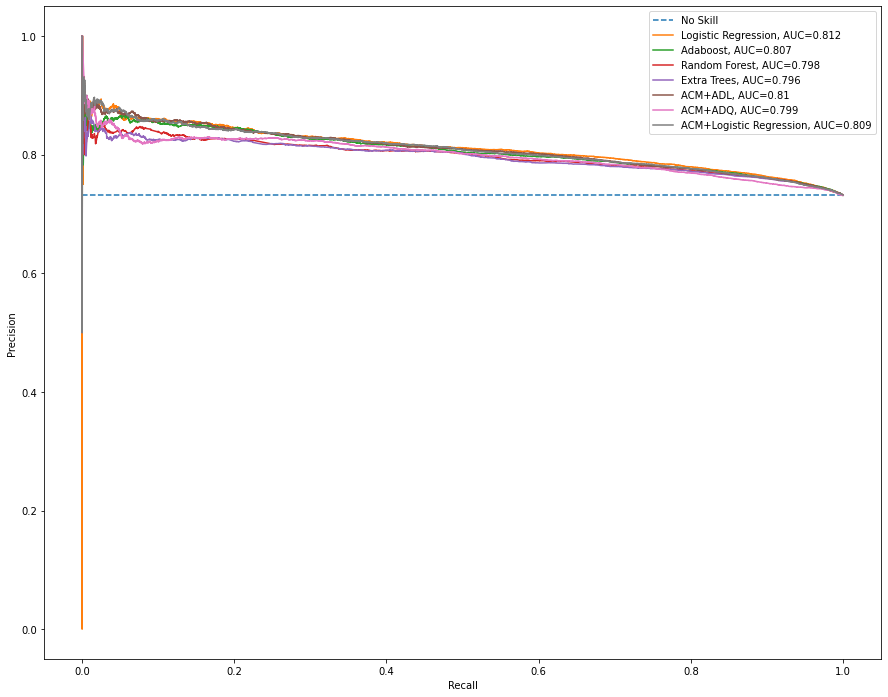

In [ ]:
change_test_Y_s = test_Y_s.copy()
change_test_Y_s[change_test_Y_s==1] = 0
change_test_Y_s[change_test_Y_s==2] = 1

change_test_Y_s_acm = test_Y_s_acm.copy()
change_test_Y_s_acm[change_test_Y_s_acm==1] = 0
change_test_Y_s_acm[change_test_Y_s_acm==2] = 1

plt.figure(figsize=(15,12))

no_skill = len(change_test_Y_s[change_test_Y_s==1]) / len(change_test_Y_s)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

lr_precision, lr_recall, _ = precision_recall_curve(change_test_Y_s, model_17_cw.predict_proba(test_X_s)[:,1] )
plt.plot(lr_recall, lr_precision, label = "Logistic Regression" + ", AUC=" +str(round(auc(lr_recall,lr_precision),3 )))

lr_precision, lr_recall, _ = precision_recall_curve(change_test_Y_s, final_model_AdaBoost.predict_proba(test_X_s)[:,1] )
plt.plot(lr_recall, lr_precision, label = "Adaboost" + ", AUC=" +str(round(auc(lr_recall,lr_precision),3 )))

lr_precision, lr_recall, _ = precision_recall_curve(change_test_Y_s, final_model_RandomForestClassifier.predict_proba(test_X_s)[:,1] )
plt.plot(lr_recall, lr_precision, label = "Random Forest" +  ", AUC=" +str(round(auc(lr_recall,lr_precision),3 )))

lr_precision, lr_recall, _ = precision_recall_curve(change_test_Y_s, final_model_ExtraTreesClassifier.predict_proba(test_X_s)[:,1] )
plt.plot(lr_recall, lr_precision, label = "Extra Trees" +  ", AUC=" +str(round(auc(lr_recall,lr_precision),3 )))

lr_precision, lr_recall, _ = precision_recall_curve(change_test_Y_s_acm, final_model_ADL.predict_proba(test_X_s_acm)[:,1] )
plt.plot(lr_recall, lr_precision, label = "ACM+ADL" +  ", AUC=" +str(round(auc(lr_recall,lr_precision),3 )))

lr_precision, lr_recall, _ = precision_recall_curve(change_test_Y_s_acm, final_model_ADQ.predict_proba(test_X_s_acm)[:,1] )
plt.plot(lr_recall, lr_precision, label = "ACM+ADQ" +  ", AUC=" +str(round(auc(lr_recall,lr_precision),3 )))

lr_precision, lr_recall, _ = precision_recall_curve(change_test_Y_s_acm, model_17_cw_ACM.predict_proba(test_X_s_acm)[:,1] )
plt.plot(lr_recall, lr_precision, label = "ACM+Logistic Regression" + ", AUC=" +str(round(auc(lr_recall,lr_precision),3 )))


#plt.ylim(no_skill,1)
plt.legend()
plt.xlabel('Recall')
plt.ylabel('Precision')

In [ ]:

################################################################################################################
#                                                       TEST
################################################################################################################


In [ ]:
model_17_cw =("logistic", LogisticRegression(random_state =0, C=0.01,penalty="l2" , solver="newton-cg", max_iter= 10000, class_weight="balanced") )
final_model_ADL = ("ADL" , LinearDiscriminantAnalysis())
final_model_ADQ =("ADQ", )

final_model_AdaBoost = ("Adaboost" , AdaBoostClassifier(base_estimator = DecisionTreeClassifier(class_weight="balanced", criterion="entropy",max_depth=2),n_estimators = 50 , random_state=0) )
final_model_RandomForestClassifier =('Random', RandomForestClassifier(class_weight="balanced", criterion="entropy", max_depth=2, max_features=25, n_estimators = 100, random_state=0) ) 
#final_model_ExtraTreesClassifier = ("Extra", ExtraTreesClassifier( criterion="entropy", max_depth=2, max_features=25, n_estimators=100 , class_weight="balanced", random_state=0) )
#final_model_DecisionTreeClassifier =("Tree" , DecisionTreeClassifier(random_state = 0, criterion="gini", class_weight = "balanced", max_depth = 2, max_features=13, min_samples_split=0.05 ))


models = [model_17_cw, final_model_ADL, final_model_AdaBoost, final_model_RandomForestClassifier]


In [ ]:
model_Stacking = StackingClassifier(estimators=models, final_estimator=LogisticRegression(random_state =0, C=0.01,penalty="l2" , solver="newton-cg", max_iter= 10000, class_weight="balanced") , cv=5)
#model_Stacking = StackingClassifier(estimators=models)

evaluation(model_Stacking, train_X_s, train_Y_s, test_X_s, test_Y_s, scoring="recall", plot=False)

test set : 
[[2944 2387]
 [5074 9455]]
              precision    recall  f1-score   support

           1       0.37      0.55      0.44      5331
           2       0.80      0.65      0.72     14529

    accuracy                           0.62     19860
   macro avg       0.58      0.60      0.58     19860
weighted avg       0.68      0.62      0.64     19860

train set : 
[[11606  9791]
 [19756 38283]]
              precision    recall  f1-score   support

           1       0.37      0.54      0.44     21397
           2       0.80      0.66      0.72     58039

    accuracy                           0.63     79436
   macro avg       0.58      0.60      0.58     79436
weighted avg       0.68      0.63      0.65     79436

GRAPHIQUE NON DEMANDE


In [ ]:
table_test =vingtiles(model = model_Stacking, data_orig = data, affichage=True,
            save=False, path = "/content/drive/MyDrive/spad_score_method_1/spad_projection_FDFTOT21/Fichier_excel_vingtiles/train_test_Decision_Tree_Classifier.xlsx")

                    IDENT     PROBA
29258  000292590010349235  0.297964
58611  000586120010386243  0.299074
17995  000179960010281361  0.299366
36430  000364310010361036  0.301525
87780  000877810010522654  0.301623
...                   ...       ...
83536  000835370010503920  0.865007
60221  000602220010392936  0.866157
77220  000772210010412631  0.867271
83624  000836250010504178  0.867271
82851  000828520010500476  0.867271

[99296 rows x 2 columns]
0.863065    49
0.707786    28
0.651320    24
0.764618    19
0.717558    19
            ..
0.519585     1
0.395626     1
0.391638     1
0.528401     1
0.479880     1
Name: PROBA, Length: 96552, dtype: int64
                PROBA
29258  (0.297, 0.359]
58611  (0.297, 0.359]
17995  (0.297, 0.359]
36430  (0.297, 0.359]
87780  (0.297, 0.359]
...               ...
83536  (0.685, 0.867]
60221  (0.685, 0.867]
77220  (0.685, 0.867]
83624  (0.685, 0.867]
82851  (0.685, 0.867]

[99296 rows x 1 columns]
Top_mon            1     2  TOTAL
TRANCHES    

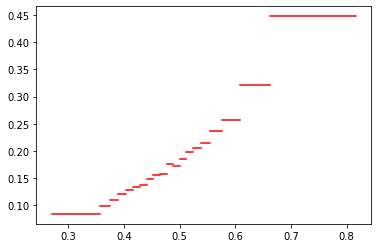

In [ ]:
#plt.plot(table_test.index.astype(str)[0],[table_test.iloc[0,0]]*10)
val_ind = 0
for i in table_test.index :
    
    plt.plot([i.left,i.right], [table_test.iloc[val_ind,0]/table_test.iloc[val_ind,2]]*2, 'red' )
    val_ind+=1


[630, 630]


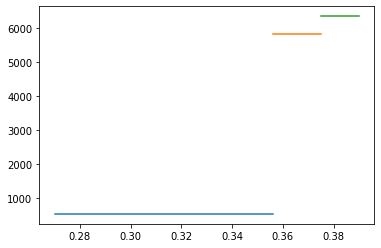

In [ ]:
table_test.index.astype(str)[0]
plt.plot([0.27,0.356], [table_test.iloc[0,0]]*2 , '-')
plt.plot([0.356, 0.375], [table_test.iloc[0,1]]*2 )
plt.plot([0.375, 0.39], [table_test.iloc[0,2]]*2 )
print([table_test.iloc[1,0]]*2)

In [ ]:
model_17_cw =("logistic", LogisticRegression(random_state =0, solver="newton-cg", max_iter= 10000, class_weight="balanced") )
final_model_AdaBoost = ("Adaboost" , AdaBoostClassifier(base_estimator = DecisionTreeClassifier(class_weight="balanced", criterion="entropy",max_depth=2),n_estimators = 50 , random_state=0) )
final_model_RandomForestClassifier =('Random', RandomForestClassifier(class_weight="balanced", criterion="entropy", max_depth=2, max_features=25, n_estimators = 100, random_state=0) ) 

models = [model_17_cw, final_model_AdaBoost, final_model_RandomForestClassifier]

In [ ]:
model_Stacking = StackingClassifier(estimators=models, final_estimator=LogisticRegression(random_state =0, C=0.01,penalty="l2" , solver="newton-cg", max_iter= 10000, class_weight="balanced") , cv=5)
evaluation(model_Stacking, train_X_s, train_Y_s, test_X_s, test_Y_s, scoring="recall", plot=False)


KeyboardInterrupt: ignored

In [ ]:
model_17_cw =("logistic", LogisticRegression(random_state =0, solver="newton-cg", max_iter= 10000) )
final_model_AdaBoost = ("Adaboost" , AdaBoostClassifier(base_estimator = DecisionTreeClassifier( criterion="entropy",max_depth=5),n_estimators = 50 , random_state=0) )
final_model_RandomForestClassifier =('Random', RandomForestClassifier( criterion="entropy", max_depth=5, max_features=7, n_estimators = 100, random_state=0) ) 

models = [model_17_cw, final_model_AdaBoost, final_model_RandomForestClassifier]

In [ ]:
model_Stacking = StackingClassifier(estimators=models, final_estimator=LogisticRegression(class_weight="balanced") , cv=5)
evaluation(model_Stacking, train_X_s, train_Y_s, test_X_s, test_Y_s, scoring="recall", plot=False)


test set : 
[[ 2369  2310]
 [ 6632 14112]]
              precision    recall  f1-score   support

           1       0.26      0.51      0.35      4679
           2       0.86      0.68      0.76     20744

    accuracy                           0.65     25423
   macro avg       0.56      0.59      0.55     25423
weighted avg       0.75      0.65      0.68     25423

train set : 
[[ 9748  9029]
 [25545 57370]]
              precision    recall  f1-score   support

           1       0.28      0.52      0.36     18777
           2       0.86      0.69      0.77     82915

    accuracy                           0.66    101692
   macro avg       0.57      0.61      0.56    101692
weighted avg       0.76      0.66      0.69    101692

GRAPHIQUE NON DEMANDE


test set : 
[[ 2526  2153]
 [ 7508 13236]]
              precision    recall  f1-score   support

           1       0.25      0.54      0.34      4679
           2       0.86      0.64      0.73     20744

    accuracy                           0.62     25423
   macro avg       0.56      0.59      0.54     25423
weighted avg       0.75      0.62      0.66     25423

train set : 
[[10414  8363]
 [29202 53713]]
              precision    recall  f1-score   support

           1       0.26      0.55      0.36     18777
           2       0.87      0.65      0.74     82915

    accuracy                           0.63    101692
   macro avg       0.56      0.60      0.55    101692
weighted avg       0.75      0.63      0.67    101692

GRAPHIQUE NON DEMANDE
test set : 
[[ 2552  2127]
 [ 7537 13207]]
              precision    recall  f1-score   support

           1       0.25      0.55      0.35      4679
           2       0.86      0.64      0.73     20744

    accuracy                  

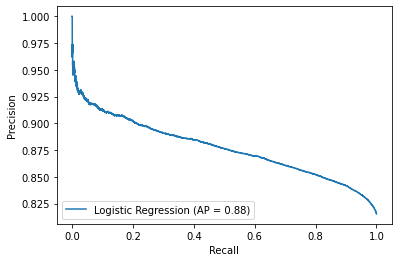

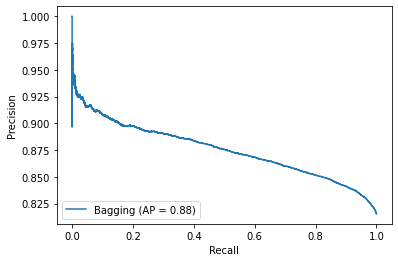

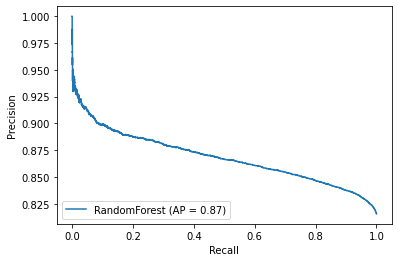

In [ ]:
model_17_cw = LogisticRegression(random_state =0, C=3,penalty="l1" , solver="liblinear", max_iter= 10000, class_weight="balanced")
evaluation(model_17_cw, train_X_s, train_Y_s, test_X_s, test_Y_s, scoring="recall", plot=False )


final_model_Bagging = BaggingClassifier(base_estimator = LogisticRegression(C=4.5, penalty="l1", solver="liblinear" ,random_state =0, max_iter= 10000, class_weight="balanced"),
                                        bootstrap=True, bootstrap_features=True, n_estimators=20)
evaluation(final_model_Bagging, train_X_s, train_Y_s, test_X_s, test_Y_s, scoring="recall", plot=False)


final_model_RandomForestClassifier = RandomForestClassifier(class_weight="balanced", criterion="entropy", max_depth=5, max_features=6, n_estimators = 20, random_state=0) 
evaluation(final_model_RandomForestClassifier, train_X_s, train_Y_s, test_X_s, test_Y_s, scoring="recall", plot=False)


plot_precision_recall_curve(model_17_cw, train_X_s, train_Y_s, name = 'Logistic Regression')
plot_precision_recall_curve(final_model_Bagging, train_X_s, train_Y_s, name = 'Bagging')
plot_precision_recall_curve(final_model_RandomForestClassifier, train_X_s, train_Y_s, name = 'RandomForest')



Text(0, 0.5, 'Precision')

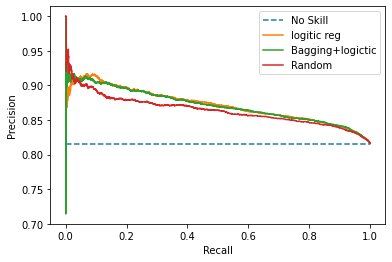

In [ ]:
#plt.figure(figsize=(5,8))
change_test_Y_s = test_Y_s.copy()
change_test_Y_s[change_test_Y_s==1] = 0
change_test_Y_s[change_test_Y_s==2] = 1

no_skill = len(change_test_Y_s[change_test_Y_s==1]) / len(change_test_Y_s)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

lr_precision, lr_recall, _ = precision_recall_curve(change_test_Y_s, model_17_cw.predict_proba(test_X_s)[:,1] )
plt.plot(lr_recall, lr_precision, label = "logitic reg")

lr_precision, lr_recall, _ = precision_recall_curve(change_test_Y_s, final_model_Bagging.predict_proba(test_X_s)[:,1] )
plt.plot(lr_recall, lr_precision, label = "Bagging+logictic")

lr_precision, lr_recall, _ = precision_recall_curve(change_test_Y_s, final_model_RandomForestClassifier.predict_proba(test_X_s)[:,1] )
plt.plot(lr_recall, lr_precision, label = "Random")

plt.legend()
plt.xlabel('Recall')
plt.ylabel('Precision')